In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [36]:
df = pd.read_excel(r'C:\Users\Kashi\Downloads\bank-full.xlsx')


In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
df.shape

(45211, 17)

In [40]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [41]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [44]:
# Apply label encoding to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])


In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [47]:
x = df.iloc[:,0:17]
y = df['y']

In [50]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Kashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = classifier.predict(x)

In [52]:
y_pred_df = pd.DataFrame({'Actual':y, 'Predicted': y_pred})

In [53]:
y_pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39082,   840],
       [ 2902,  2387]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     39922
           1       0.74      0.45      0.56      5289

    accuracy                           0.92     45211
   macro avg       0.84      0.72      0.76     45211
weighted avg       0.91      0.92      0.91     45211



In [58]:
classifier.predict_proba(x)

array([[0.97127572, 0.02872428],
       [0.97660093, 0.02339907],
       [0.98760851, 0.01239149],
       ...,
       [0.42457691, 0.57542309],
       [0.98339776, 0.01660224],
       [0.19606082, 0.80393918]])

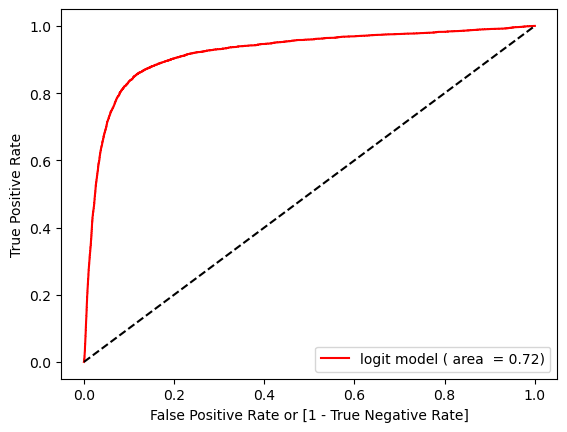

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9172325319059521